In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("openaq (2).csv")

In [4]:
df.head()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:15:00.000Z,2019-05-03T06:45:00+05:30,o3,42.34,µg/m³,12.920984,77.584908,"[{""name"":""Central Pollution Control Board"",""ur..."
1,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:15:00.000Z,2019-05-03T06:45:00+05:30,so2,3.30,µg/m³,12.920984,77.584908,"[{""name"":""Central Pollution Control Board"",""ur..."
2,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2019-05-03T01:15:00.000Z,2019-05-03T06:45:00+05:30,co,1090.00,µg/m³,13.027020,77.494094,"[{""name"":""Central Pollution Control Board"",""ur..."
3,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:15:00.000Z,2019-05-03T06:45:00+05:30,o3,23.72,µg/m³,12.917348,77.622813,"[{""name"":""Central Pollution Control Board"",""ur..."
4,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:15:00.000Z,2019-05-03T06:45:00+05:30,co,540.00,µg/m³,12.917348,77.622813,"[{""name"":""Central Pollution Control Board"",""ur..."


In [5]:
print("Total size of the data :{} \n{}".format(len(df),df.groupby("parameter").size()))


Total size of the data :17365 
parameter
co      3312
no2     3352
o3      2331
pm10    2296
pm25    2758
so2     3316
dtype: int64


In [6]:
print(df.groupby(['location', 'parameter']).size())

location                                 parameter
BTM Layout, Bengaluru - CPCB             co           325
                                         no2          326
                                         o3           326
                                         pm25         326
                                         so2          309
BWSSB Kadabesanahalli, Bengaluru - CPCB  co           395
                                         no2          395
                                         o3           395
                                         pm25         395
                                         so2          395
Bapuji Nagar, Bengaluru - KSPCB          co            98
                                         no2          118
                                         o3           121
                                         pm10         112
                                         pm25         110
                                         so2          110
City Railway Station,

In [7]:
df1 = df.pivot(columns='parameter', values='value')

In [8]:
df1.fillna(value=0,inplace=True)

In [9]:
df1.head()

parameter,co,no2,o3,pm10,pm25,so2
0,0.0,0.0,42.34,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.0,3.3
2,1090.0,0.0,0.00,0.0,0.0,0.0
3,0.0,0.0,23.72,0.0,0.0,0.0
4,540.0,0.0,0.00,0.0,0.0,0.0


In [10]:
names = df1.columns

In [11]:
names

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'], dtype='object', name='parameter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f530859c5f8>,
      dtype=object)

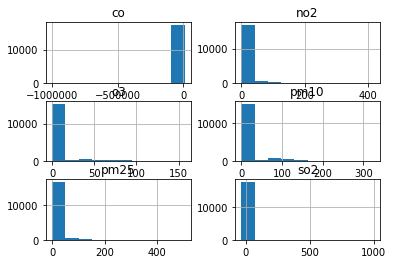

In [12]:
df1.hist()

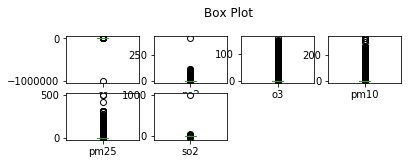

In [13]:
df1.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False,title='Box Plot')
plt.show()

In [14]:
df = df[df['value']>=0]

In [15]:
df.head()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:15:00.000Z,2019-05-03T06:45:00+05:30,o3,42.34,µg/m³,12.920984,77.584908,"[{""name"":""Central Pollution Control Board"",""ur..."
1,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:15:00.000Z,2019-05-03T06:45:00+05:30,so2,3.30,µg/m³,12.920984,77.584908,"[{""name"":""Central Pollution Control Board"",""ur..."
2,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2019-05-03T01:15:00.000Z,2019-05-03T06:45:00+05:30,co,1090.00,µg/m³,13.027020,77.494094,"[{""name"":""Central Pollution Control Board"",""ur..."
3,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:15:00.000Z,2019-05-03T06:45:00+05:30,o3,23.72,µg/m³,12.917348,77.622813,"[{""name"":""Central Pollution Control Board"",""ur..."
4,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:15:00.000Z,2019-05-03T06:45:00+05:30,co,540.00,µg/m³,12.917348,77.622813,"[{""name"":""Central Pollution Control Board"",""ur..."


In [16]:
len(df)

17363

In [ ]:
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('parameter', axis=1):
    num+=1
    plt.plot(df['parameter'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

    
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")


In [18]:
df2 = pd.concat([df['location'],df['utc'],df['parameter'],df['value']],axis=1,keys=['location', 'utc','parameter','value'])

In [19]:
df2.set_index('utc',inplace=True)

In [20]:
df2 = df2[df2['value']>=0]

In [21]:
len(df2)

17363

In [22]:
df3 = df2.head(500)

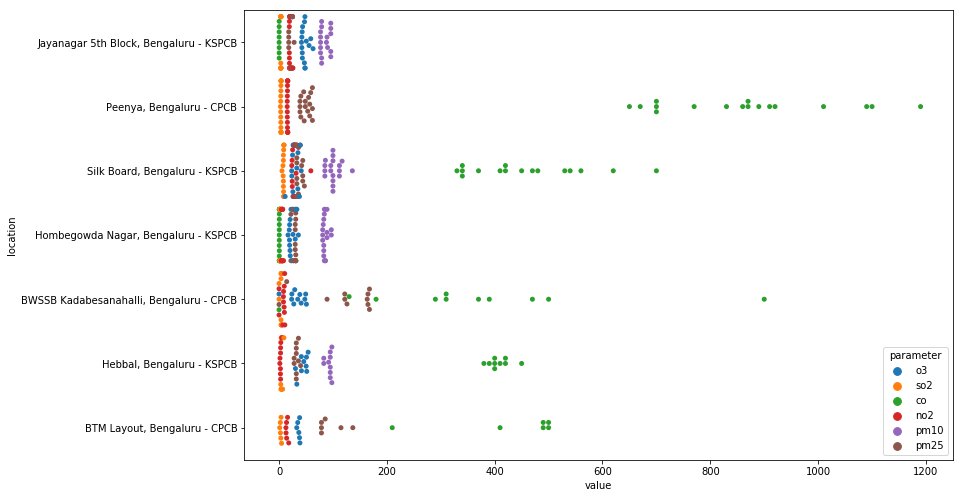

In [23]:
a4_dims = (12.7, 8.27)
fig, ax = plt.subplots(1,figsize=a4_dims)
sns.catplot(ax=ax,x="value", y="location", hue="parameter", kind="swarm", data=df3)
plt.close(2)
plt.show()

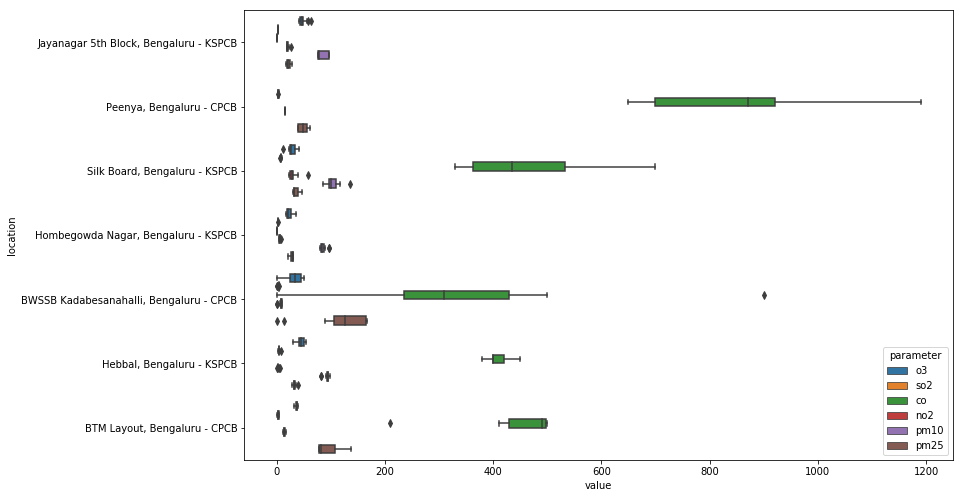

In [24]:
%matplotlib inline
a4_dims = (12.7, 8.27)
fig, ax = plt.subplots(1,figsize=a4_dims)
sns.catplot(ax=ax,x="value", y="location", hue="parameter", kind="box", data=df3)
plt.close(2)
plt.show()


In [25]:
df = df[df['value']>=0]
df1 = df.pivot(columns='parameter', values='value')

In [26]:
df1.head()

parameter,co,no2,o3,pm10,pm25,so2
0,NaN,NaN,42.34,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,3.3
2,1090.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,23.72,NaN,NaN,NaN
4,540.0,NaN,NaN,NaN,NaN,NaN


In [27]:
df1.fillna(value=0,inplace=True)

In [28]:
df4 = pd.concat([df['location'],df['utc']],axis=1,keys=['location', 'utc'])
df5 = pd.concat([df4,df1], axis=1)

In [29]:
df5.set_index('utc',inplace=True)

In [30]:
df5

,location,co,no2,o3,pm10,pm25,so2
utc,,,,,,,
2019-05-03T01:15:00.000Z,"Jayanagar 5th Block, Bengaluru - KSPCB",0.00,0.00,42.34,0.0,0.00,0.00
2019-05-03T01:15:00.000Z,"Jayanagar 5th Block, Bengaluru - KSPCB",0.00,0.00,0.00,0.0,0.00,3.30
2019-05-03T01:15:00.000Z,"Peenya, Bengaluru - CPCB",1090.00,0.00,0.00,0.0,0.00,0.00
2019-05-03T01:15:00.000Z,"Silk Board, Bengaluru - KSPCB",0.00,0.00,23.72,0.0,0.00,0.00
2019-05-03T01:15:00.000Z,"Silk Board, Bengaluru - KSPCB",540.00,0.00,0.00,0.0,0.00,0.00
2019-05-03T01:15:00.000Z,"Silk Board, Bengaluru - KSPCB",0.00,0.00,0.00,0.0,0.00,8.10
2019-05-03T01:15:00.000Z,"Silk Board, Bengaluru - KSPCB",0.00,30.80,0.00,0.0,0.00,0.00
2019-05-03T01:15:00.000Z,"Hombegowda Nagar, Bengaluru - KSPCB",0.00,0.00,0.00,0.0,0.00,2.40
2019-05-03T01:15:00.000Z,"Silk Board, Bengaluru - KSPCB",0.00,0.00,0.00,117.0,0.00,0.00


Text(0, 0.5, 'Score')

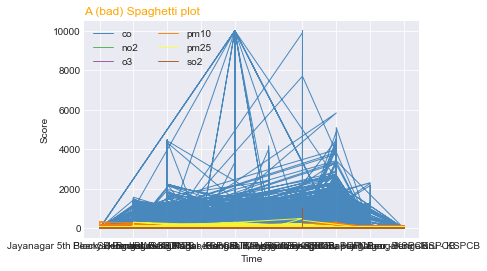

In [31]:
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df5.drop('location', axis=1):
    num+=1
    plt.plot(df5['location'], df5[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

    
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")

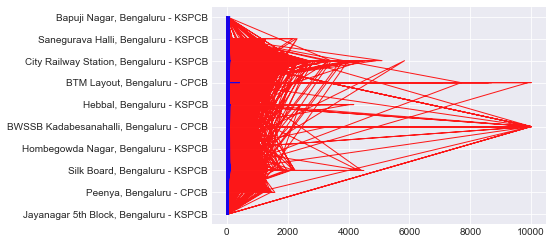

In [32]:
plt.plot(df5['co'],df5['location'], marker='', color='red', linewidth=1, alpha=0.9 )
plt.plot(df5['no2'],df5['location'], marker='', color='blue', linewidth=1, alpha=0.9 )

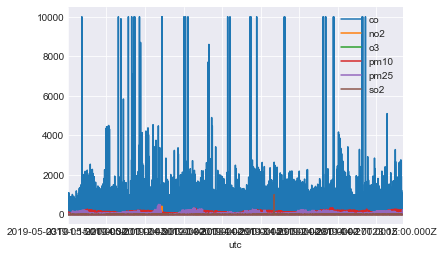

In [33]:
df5.plot()

In [34]:
g = df.groupby('parameter').size()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5305c2f080>,
      dtype=object)

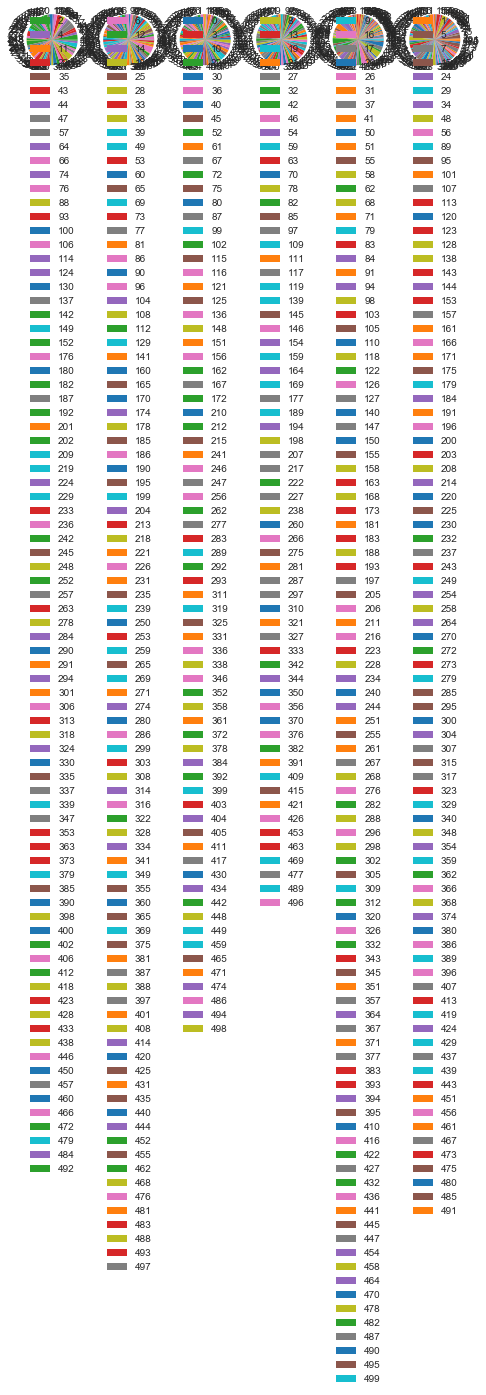

In [35]:
df7 = df1.head(500)
df7.plot(kind='pie', subplots=True, figsize=(8, 8))

In [38]:
df1.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'], dtype='object', name='parameter')

In [63]:
df8 = pd.concat([df['parameter'],df['value']],axis=1,keys=['parameter','value'])

In [49]:
df8.set_index('parameter',inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f52fcf21828>],
      dtype=object)

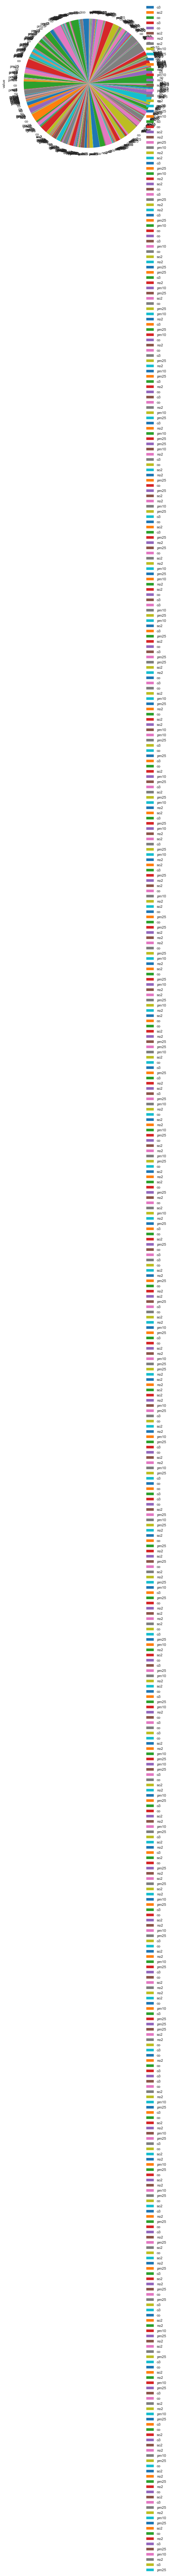

In [51]:
df9 = df8.head(500)
#df9
df9.plot(kind='pie', subplots=True, figsize=(8, 8))

In [52]:
print("hello")

hello


In [55]:
names = pd.unique(df['parameter'])

In [109]:
size = df.groupby('parameter').sum()

In [111]:
size.drop(columns=['latitude','longitude'], inplace=True)

In [113]:
df10 = pd.DataFrame(names,size)

In [115]:
df10.set_index(0,inplace=True)

In [116]:
df10['Value']=size

In [117]:
df10

,Value
0,
o3,123157.43
so2,16521.10
co,2512020.62
no2,82034.98
pm10,235347.02
pm25,147780.68


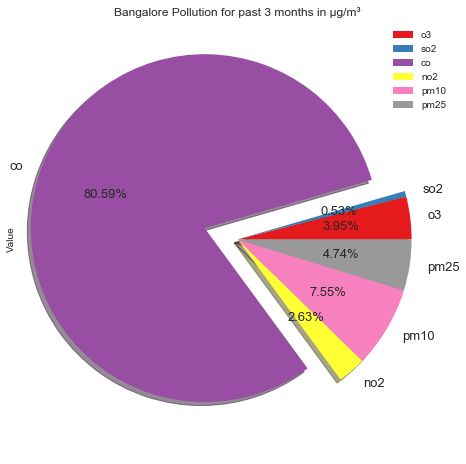

In [165]:
explode = (0.0, 0.0, 0.2, 0.0,0.0,0.0)
a=np.random.random(10)
cs=cm.Set1(np.arange(10)/5)
df10.plot(kind='pie', subplots=True, figsize=(8, 8),fontsize=13,shadow=True,colors=cs,autopct='%.2f%%',explode = explode)
plt.title("Bangalore Pollution for past 3 months in µg/m³")
plt.savefig("Pollution in 3 months.png")

In [112]:
s

,value
parameter,
co,2512020.62
no2,82034.98
o3,123157.43
pm10,235347.02
pm25,147780.68
so2,16521.10
